<a href="https://colab.research.google.com/github/hernanmorales-navarrete/DataAnalysisWithPython/blob/main/Network_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification with Machine Learning

- This interactive Jupyter Notebook offers a comprehensive guide to text emotion classification using machine learning models. Students will explore key concepts in text preprocessing, TF-IDF vectorization, and classification techniques with Naive Bayes, SVM, and neural networks. The notebook provides practical exercises in data cleaning, feature engineering, model training, evaluation, and performance comparison. By analyzing a real-world dataset from Kaggle, students will gain hands-on experience in applying machine learning to classify text into multiple emotion categories, fostering skills in data science, NLP, and algorithm implementation

## Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import random


## 1. Load the dataset

In [39]:
# Load the dataset
# Make sure to download the "Emotion Detection from Text" dataset from Kaggle


# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/tweet_emotions.csv")

# Display the first few rows of the dataset
df.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [40]:
# Data Cleaning

# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

# Drop rows with missing values if any
df.dropna(inplace=True)

# Remove duplicates if present
df.drop_duplicates(inplace=True)

# Check the unique emotion classes
print(f"Unique emotions:\n{df['sentiment'].unique()}")


# Remove rows with the sentiment 'empty'
df = df[df['sentiment'] != 'empty']

# Check the unique emotion classes
print(f"Unique emotions:\n{df['sentiment'].unique()}")

# Print the dimensions of the DataFrame
print(f"Dimensions of the DataFrame: {df.shape}")

Missing values:
tweet_id     0
sentiment    0
content      0
dtype: int64
Unique emotions:
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
Unique emotions:
['sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun' 'hate'
 'happiness' 'boredom' 'relief' 'anger']
Dimensions of the DataFrame: (39173, 3)


In [41]:
# Display the first few rows of the dataset
df.head()

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...


## 2. Data preparation



*   Transform a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features
*   Limits the vocabulary to the top 5000 terms ranked by their TF-IDF score

In [42]:
# ### Text Vectorization
# Convert text into numerical features using TF-IDF.

# Define the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=500)

# Transform the text content into vectors
X = vectorizer.fit_transform(df['content']).toarray()
y = df['sentiment']

print(X.shape)

(39173, 500)


In [43]:
# Encode the target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
target_names = le.classes_

print(target_names)

['anger' 'boredom' 'enthusiasm' 'fun' 'happiness' 'hate' 'love' 'neutral'
 'relief' 'sadness' 'surprise' 'worry']


In [46]:
#Split the dataset
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the dimensions of each dataset
print(f"Training set dimensions: {X_train.shape}, {y_train.shape}")
print(f"Validation set dimensions: {X_val.shape}, {y_val.shape}")
print(f"Test set dimensions: {X_test.shape}, {y_test.shape}")

print("Training   set classes:", np.unique(y_train))
print("Validation set classes:",np.unique(y_val))
print("Test       set classes:",np.unique(y_test))

Training set dimensions: (27421, 500), (27421,)
Validation set dimensions: (5876, 500), (5876,)
Test set dimensions: (5876, 500), (5876,)
Training   set classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Validation set classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Test       set classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]


## 3. Implement Classification Models

#### We will implement three models: LDA, Naive Bayes, SVM, Random Forest and a Recurrent Neural Network (approximated here with an MLPClassifier for simplicity).

In [47]:
#LDA Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
print("LDA Classification Report:")
print(classification_report(y_test, y_pred_lda, target_names=target_names))


LDA Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.05      0.19      0.08        26
  enthusiasm       0.05      0.02      0.03       117
         fun       0.17      0.13      0.15       252
   happiness       0.34      0.30      0.32       787
        hate       0.34      0.29      0.31       227
        love       0.45      0.35      0.39       544
     neutral       0.37      0.52      0.43      1326
      relief       0.19      0.13      0.15       231
     sadness       0.33      0.19      0.24       788
    surprise       0.19      0.09      0.12       305
       worry       0.33      0.41      0.37      1254

    accuracy                           0.33      5876
   macro avg       0.23      0.22      0.22      5876
weighted avg       0.32      0.33      0.32      5876



In [48]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=target_names))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        26
  enthusiasm       0.00      0.00      0.00       117
         fun       0.00      0.00      0.00       252
   happiness       0.35      0.25      0.29       787
        hate       0.78      0.03      0.06       227
        love       0.43      0.22      0.29       544
     neutral       0.32      0.58      0.41      1326
      relief       0.00      0.00      0.00       231
     sadness       0.41      0.09      0.14       788
    surprise       0.25      0.00      0.01       305
       worry       0.30      0.59      0.40      1254

    accuracy                           0.32      5876
   macro avg       0.24      0.15      0.13      5876
weighted avg       0.32      0.32      0.27      5876



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))


SVM Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        26
  enthusiasm       0.00      0.00      0.00       117
         fun       0.25      0.02      0.03       252
   happiness       0.34      0.38      0.36       787
        hate       0.53      0.18      0.27       227
        love       0.46      0.32      0.37       544
     neutral       0.36      0.57      0.44      1326
      relief       0.35      0.03      0.06       231
     sadness       0.40      0.18      0.25       788
    surprise       0.21      0.02      0.04       305
       worry       0.33      0.53      0.40      1254

    accuracy                           0.36      5876
   macro avg       0.27      0.19      0.18      5876
weighted avg       0.35      0.36      0.32      5876



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))


Random Forest Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        26
  enthusiasm       0.00      0.00      0.00       117
         fun       0.12      0.02      0.03       252
   happiness       0.30      0.30      0.30       787
        hate       0.51      0.17      0.25       227
        love       0.42      0.31      0.36       544
     neutral       0.35      0.51      0.41      1326
      relief       0.24      0.04      0.07       231
     sadness       0.33      0.17      0.23       788
    surprise       0.12      0.02      0.03       305
       worry       0.30      0.51      0.38      1254

    accuracy                           0.33      5876
   macro avg       0.22      0.17      0.17      5876
weighted avg       0.31      0.33      0.29      5876



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42, verbose=True)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=target_names))


Iteration 1, loss = 2.17136590
Iteration 2, loss = 1.93895874
Iteration 3, loss = 1.85062150
Iteration 4, loss = 1.80853818
Iteration 5, loss = 1.78444342
Iteration 6, loss = 1.76853634
Iteration 7, loss = 1.75569672
Iteration 8, loss = 1.74558962
Iteration 9, loss = 1.73673607
Iteration 10, loss = 1.72898012
MLP Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        26
  enthusiasm       0.00      0.00      0.00       117
         fun       0.17      0.03      0.05       252
   happiness       0.33      0.34      0.34       787
        hate       0.47      0.18      0.26       227
        love       0.42      0.38      0.40       544
     neutral       0.37      0.55      0.44      1326
      relief       0.20      0.04      0.07       231
     sadness       0.35      0.17      0.23       788
    surprise       0.30      0.06      0.09       305
       worry 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

Iteration 1, loss = 2.17136590
Epoch 1: Train Loss = 1.9996, Validation Loss = 2.0055
Iteration 1, loss = 1.93978163
Epoch 2: Train Loss = 1.8714, Validation Loss = 1.9009
Iteration 1, loss = 1.85087910
Epoch 3: Train Loss = 1.8115, Validation Loss = 1.8633
Iteration 1, loss = 1.80879613
Epoch 4: Train Loss = 1.7804, Validation Loss = 1.8518
Iteration 1, loss = 1.78477601
Epoch 5: Train Loss = 1.7606, Validation Loss = 1.8489
Iteration 1, loss = 1.76854028
Epoch 6: Train Loss = 1.7463, Validation Loss = 1.8496
Iteration 1, loss = 1.75627795
Epoch 7: Train Loss = 1.7351, Validation Loss = 1.8517
Iteration 1, loss = 1.74619927
Epoch 8: Train Loss = 1.7255, Validation Loss = 1.8543
Iteration 1, loss = 1.73734898
Epoch 9: Train Loss = 1.7169, Validation Loss = 1.8572
Iteration 1, loss = 1.72935662
Epoch 10: Train Loss = 1.7090, Validation Loss = 1.8603
MLP Classification Report (Test Data):
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


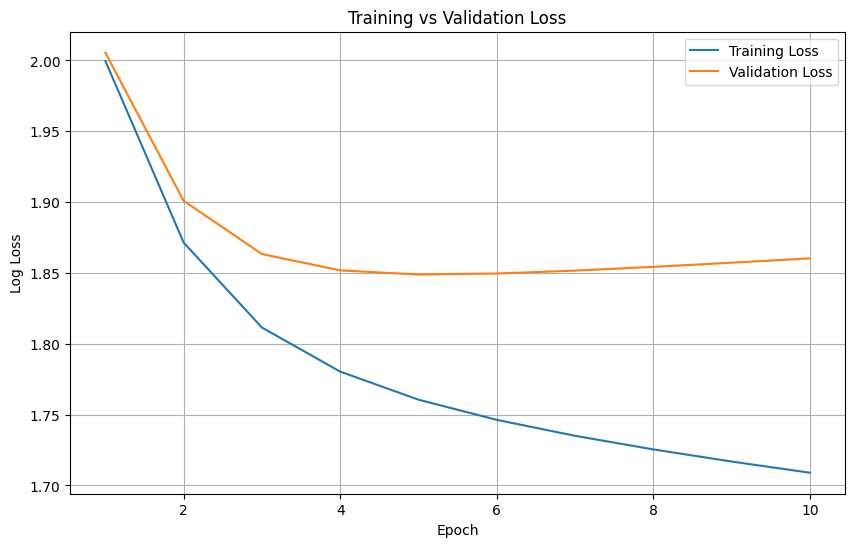

In [52]:
from sklearn.metrics import log_loss

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42, verbose=True)

# Training with validation monitoring
train_losses = []
val_losses = []

for epoch in range(1, 11):  # Limiting to 10 epochs for demonstration
    # Fit the model on the training data
    mlp_model.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Predict probabilities for training and validation data
    train_probs = mlp_model.predict_proba(X_train)
    val_probs = mlp_model.predict_proba(X_val)

    # Calculate log-loss for training and validation
    train_loss = log_loss(y_train, train_probs)
    val_loss = log_loss(y_val, val_probs)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

# Evaluate the model on the test data after training
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classification Report (Test Data):")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

# Plot training vs validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_losses, label='Training Loss')
plt.plot(range(1, 11), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


## 4. Evaluate and Compare Results


In [55]:
#Evaluate and Compare Results

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy of LDA          : {accuracy_lda}")
print(f"Accuracy of Naive Bayes  : {accuracy_nb}")
print(f"Accuracy of SVM          : {accuracy_svm}")
print(f"Accuracy of Random Forest: {accuracy_rf}")
print(f"Accuracy of MLP          : {accuracy_mlp}")

Accuracy of LDA          : 0.33185840707964603
Accuracy of Naive Bayes  : 0.3230088495575221
Accuracy of SVM          : 0.35585432266848194
Accuracy of Random Forest: 0.326072157930565
Accuracy of MLP          : 0.3463240299523485


Confusion Matrices:


<Figure size 800x600 with 0 Axes>

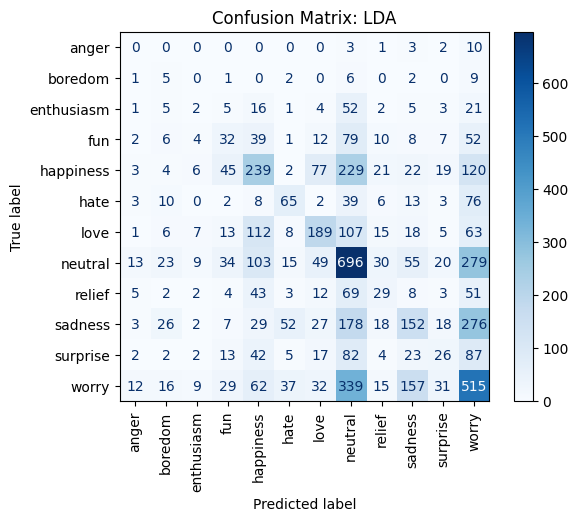

<Figure size 800x600 with 0 Axes>

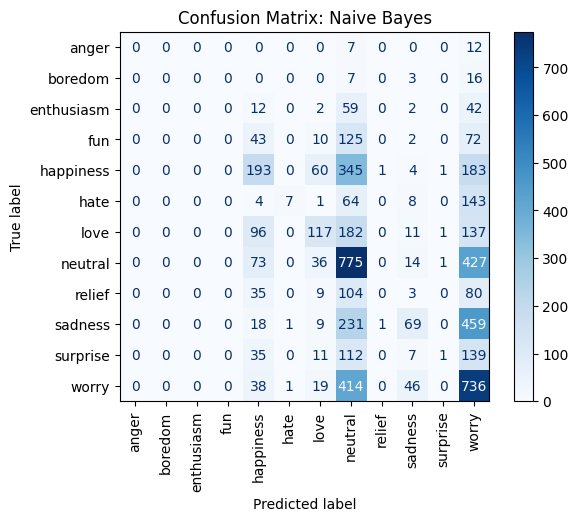

<Figure size 800x600 with 0 Axes>

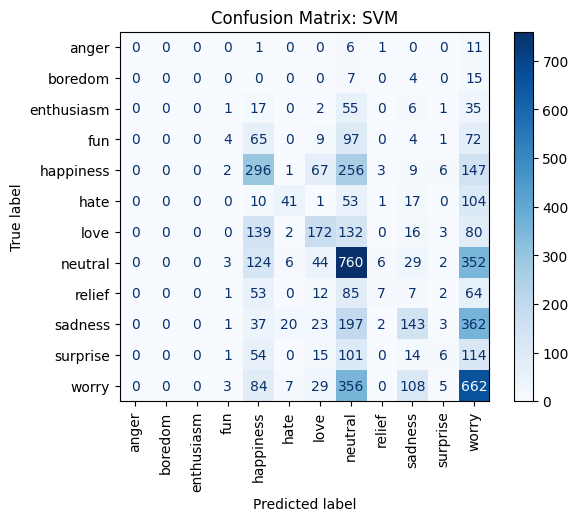

<Figure size 800x600 with 0 Axes>

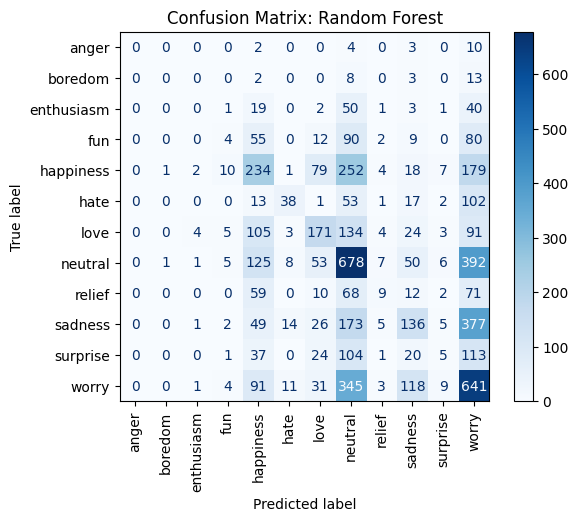

<Figure size 800x600 with 0 Axes>

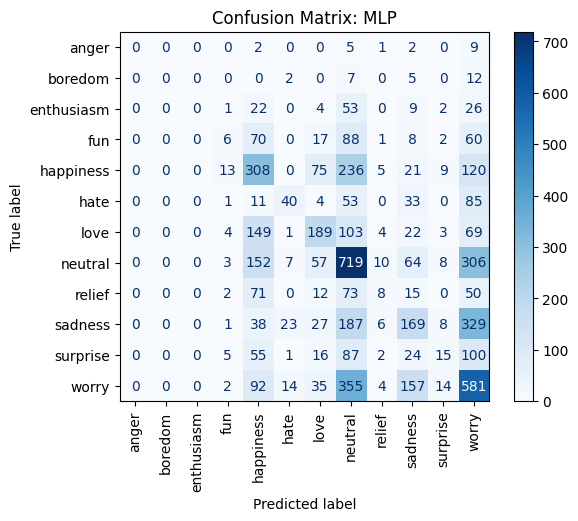

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=le.classes_, cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Generate and plot confusion matrices for each model
print("Confusion Matrices:")

# LDA
plot_confusion_matrix(y_test, y_pred_lda, "LDA")

# Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# SVM
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# MLP
plot_confusion_matrix(y_test, y_pred_mlp, "MLP")

## 5. Repeat the Process with Different Numbers of Emotion Classes

In [57]:
def filter_classes(df, num_classes):
    selected_classes = random.sample(list(df['sentiment'].unique()), num_classes)
    return df[df['sentiment'].isin(selected_classes)]


In [58]:
for num_classes in [3, 5, 7, 9, 11]:
    print(f"\nEvaluating with {num_classes} emotion classes:")
    filtered_df = filter_classes(df, num_classes)
    X = vectorizer.fit_transform(filtered_df['content']).toarray()
    y = le.fit_transform(filtered_df['sentiment'])

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"Random Forest Accuracy with {num_classes} classes: {accuracy_score(y_test, y_pred_rf)}")


Evaluating with 3 emotion classes:
Random Forest Accuracy with 3 classes: 0.8731097961867192

Evaluating with 5 emotion classes:
Random Forest Accuracy with 5 classes: 0.727076591154261

Evaluating with 7 emotion classes:
Random Forest Accuracy with 7 classes: 0.5258855585831063

Evaluating with 9 emotion classes:
Random Forest Accuracy with 9 classes: 0.4259656652360515

Evaluating with 11 emotion classes:
Random Forest Accuracy with 11 classes: 0.339811320754717
